In this notebook, I use gradcam to visulize which are the areas in an image that produce the highest activation in a given image wrt to a given label, as we can see, in most of the images the heatmap concentrates around the defining features of the bird that separates it from another bird of different label

In [4]:
!pip install grad-cam
!pip install pytorch-gradcam

  Using cached grad-cam-1.5.4.tar.gz (7.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=7ad30051df474dcac26fedb8f702cd805608a9dcc3702c4ab236265ccd6fc429
  Stored in directory: /root/.cache/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


In [38]:
from model import NeuralNet
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms.v2 as v2

from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
image_transforms = v2.Compose([
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale = True),
    v2.Resize((300, 300)), 
    v2.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [15]:
MODEL_PATH = './model_weights.pth'

PATH_IMAGE0 = './Test Images/0_137.jpg'
PATH_IMAGE1 = './Test Images/1_315.jpg'
PATH_IMAGE2 = './Test Images/2_520.jpg'
PATH_IMAGE3 = './Test Images/3_519.jpg'
PATH_IMAGE4 = './Test Images/4_531.jpg'
PATH_IMAGE5 = './Test Images/5_417.jpg'
PATH_IMAGE6 = './Test Images/6_664.jpg'
PATH_IMAGE7 = './Test Images/7_374.jpg'
PATH_IMAGE8 = './Test Images/8_631.jpg'
PATH_IMAGE9 = './Test Images/9_269.jpg'

In [14]:
net = NeuralNet().to(device)
net.load_state_dict(torch.load(MODEL_PATH, weights_only=True))

<All keys matched successfully>

In [44]:
def plot_rgb_gradcam_img(image, label):

    tensor_image = image_transforms(image).unsqueeze(0)

    target_layers = [net.conv12]
    input_tensor = image_transforms(image).unsqueeze(0)

    rgb_image = input_tensor.squeeze().numpy() /  2 + 0.5
    rgb_image = np.transpose(rgb_image, (1, 2, 0))
    
    # target for which we want to generate the CAM for.
    targets = [ClassifierOutputTarget(label)]
    
    with GradCAM(model=net, target_layers=target_layers) as cam:
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]
        visualization = show_cam_on_image(rgb_image, grayscale_cam, use_rgb=True)
        model_outputs = cam.outputs

    pred_label = np.argmax(model_outputs.detach().cpu().numpy())

    plt.figure(figsize = (10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(rgb_image)
    
    plt.subplot(1, 2, 2)
    plt.imshow(visualization)
    
    plt.show()

In [45]:
img0 = Image.open(PATH_IMAGE0)
img1 = Image.open(PATH_IMAGE1)
img2 = Image.open(PATH_IMAGE2)
img3 = Image.open(PATH_IMAGE3)
img4 = Image.open(PATH_IMAGE4)
img5 = Image.open(PATH_IMAGE5)
img6 = Image.open(PATH_IMAGE6)
img7 = Image.open(PATH_IMAGE7)
img8 = Image.open(PATH_IMAGE8)
img9 = Image.open(PATH_IMAGE9)

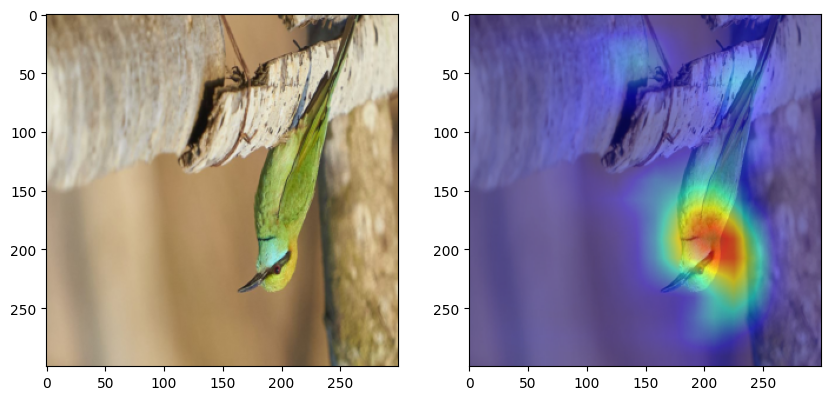

In [46]:
plot_rgb_gradcam_img(img0, 0)

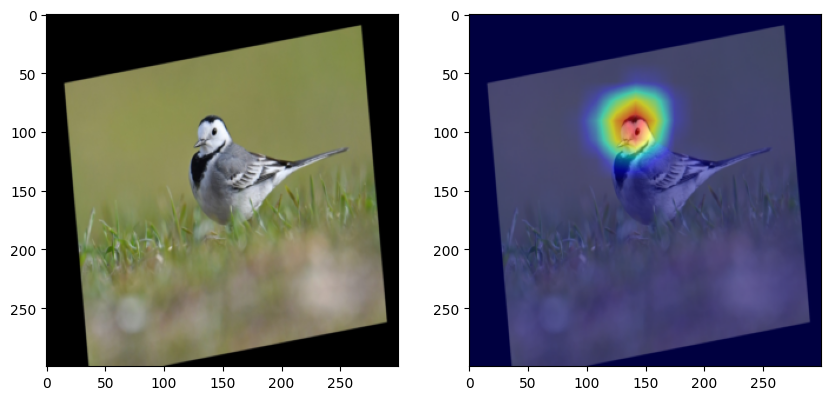

In [47]:
plot_rgb_gradcam_img(img1, 1)

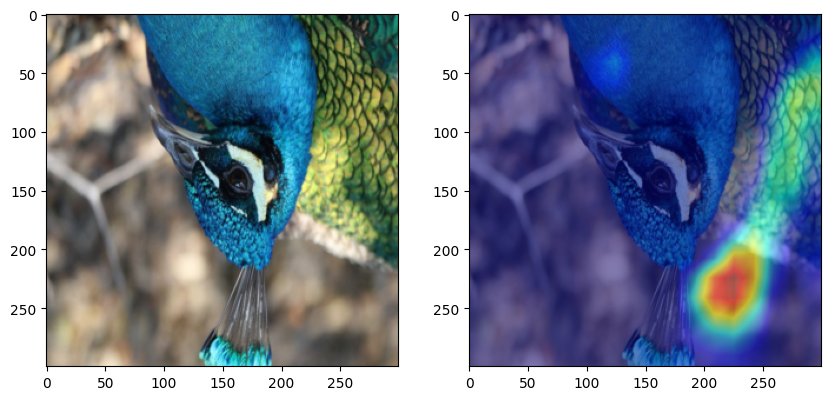

In [48]:
plot_rgb_gradcam_img(img2, 2)

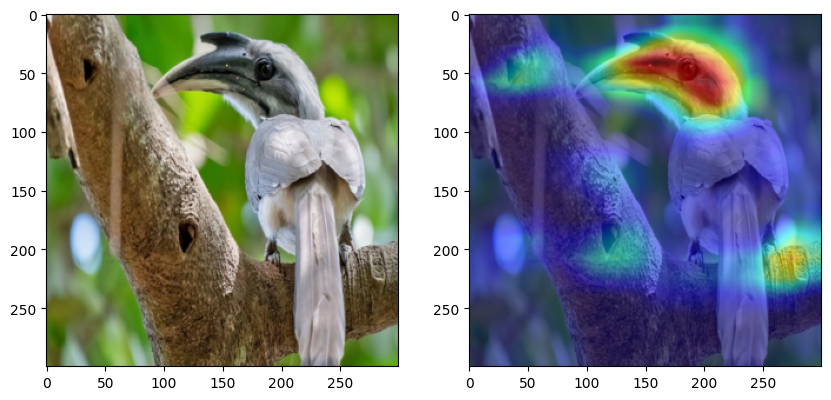

In [49]:
plot_rgb_gradcam_img(img3, 3)

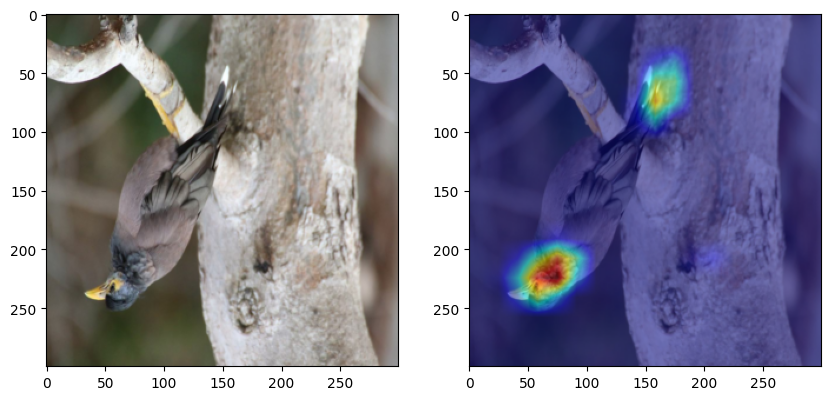

In [50]:
plot_rgb_gradcam_img(img4, 4)

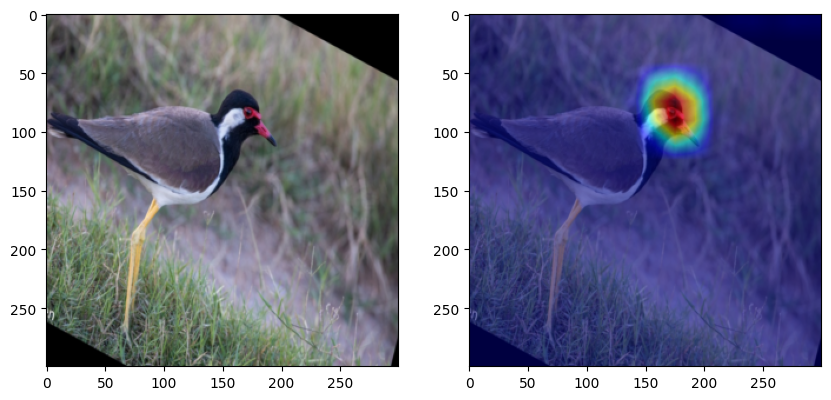

In [51]:
plot_rgb_gradcam_img(img5, 5)

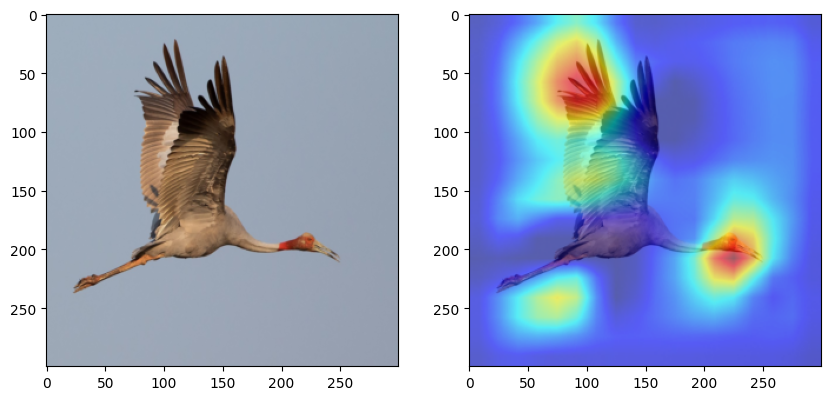

In [52]:
plot_rgb_gradcam_img(img6, 6)

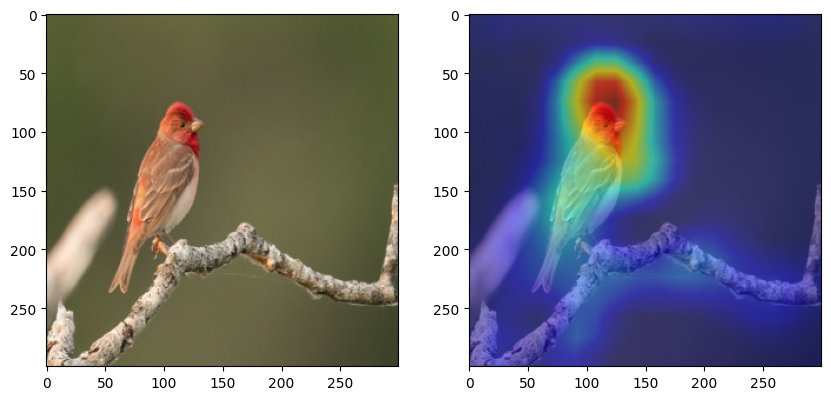

In [53]:
plot_rgb_gradcam_img(img7, 7)

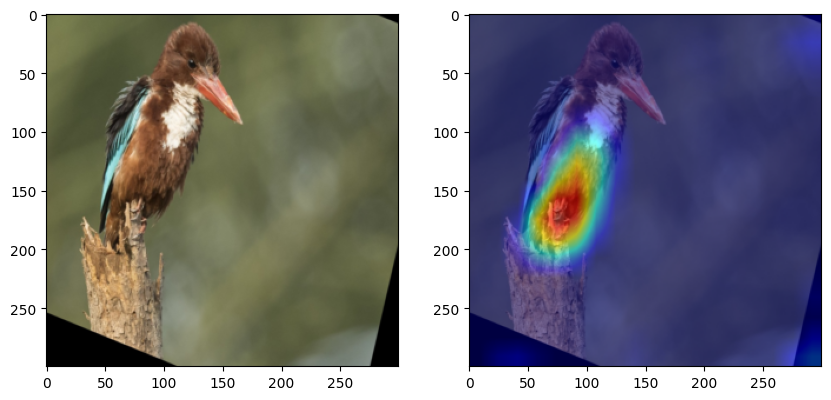

In [54]:
plot_rgb_gradcam_img(img8, 8)

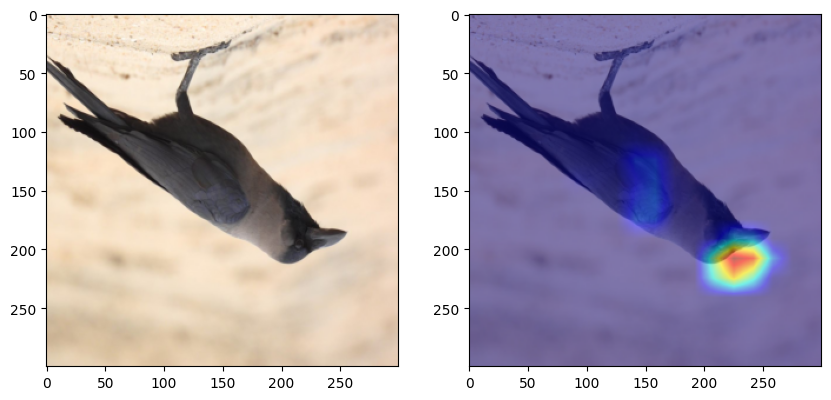

In [55]:
plot_rgb_gradcam_img(img9, 9)